In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("hacktrain.csv")
df.head()

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [ ]:
df.shape

(8000, 29)

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,NaN,-1325.64,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,-1670.590,-1408.64,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,729.790,-3162.14,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,683.254,-2829.40,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,NaN,1242.87,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


Missing percentage per NDVI column:
20150720_N     7.0
20150602_N    15.0
20150517_N    10.0
20150501_N    12.0
20150415_N     6.0
20150330_N    14.0
20150314_N     9.0
20150226_N    17.0
20150210_N     8.0
20150125_N    13.0
20150109_N    11.0
20141117_N    16.0
20141101_N     5.0
20141016_N    18.0
20140930_N    10.0
20140813_N     7.0
20140626_N    20.0
20140610_N     6.0
20140525_N     9.0
20140509_N    11.0
20140423_N    22.0
20140407_N     8.0
20140322_N    14.0
20140218_N    18.0
20140202_N     7.0
20140117_N    15.0
20140101_N     5.0
dtype: float64


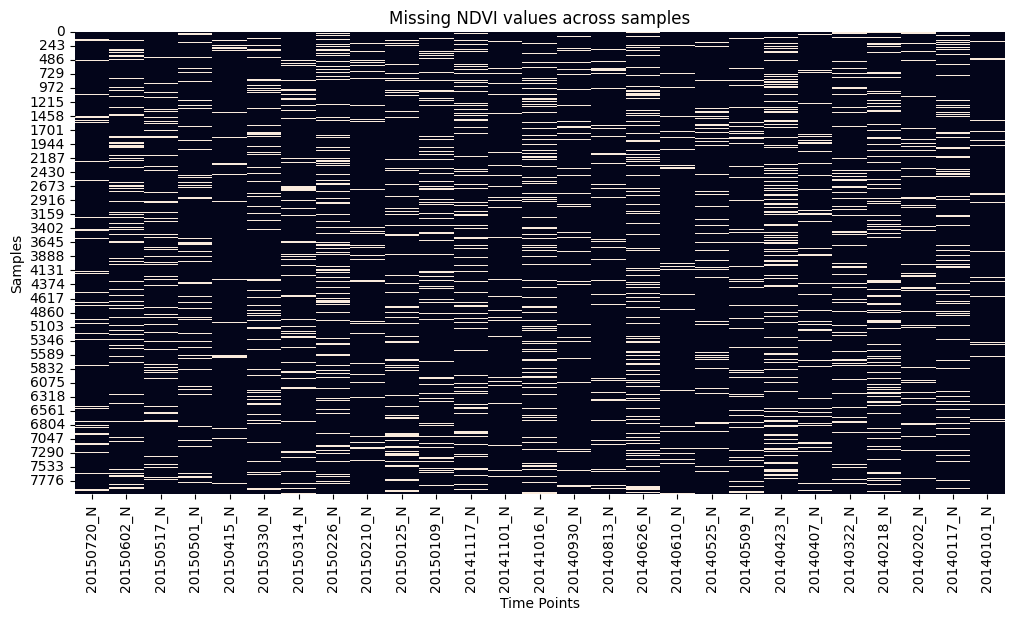

In [ ]:
# Extract NDVI columns (they end with '_N')
ndvi_cols = [col for col in df.columns if col.endswith('_N')]

# Check for missing values
missing_percent = df[ndvi_cols].isnull().mean()* 100
print("Missing percentage per NDVI column:")
print(missing_percent)

# Plot heatmap of missingness (optional)
plt.figure(figsize=(12, 6))
sns.heatmap(df[ndvi_cols].isnull(), cbar=False)
plt.title("Missing NDVI values across samples")
plt.xlabel("Time Points")
plt.ylabel("Samples")
plt.show()

# Imputation of missing values


In [ ]:
# Make a copy to preserve the original
df_linear = df.copy()

# Apply linear interpolation across each row
df_linear[ndvi_cols] = df_linear[ndvi_cols].interpolate(axis=1, limit_direction='both')

In [ ]:
from scipy.interpolate import UnivariateSpline
# Ensure numeric NDVI values
df[ndvi_cols] = df[ndvi_cols].apply(pd.to_numeric, errors='coerce')

# Copy for spline
df_spline = df.copy()

def spline_interpolate_row(row, order=3):
    x = np.arange(len(ndvi_cols))
    y = row[ndvi_cols].values.astype(float)
    mask = ~np.isnan(y)

    if sum(mask) <= order:
        return y  # return original if not enough valid points

    try:
        spline = UnivariateSpline(x[mask], y[mask], k=order, s=0)
        y_interp = spline(x)
        return pd.Series(y_interp, index=ndvi_cols)  # ensure length & type match
    except:
        return pd.Series(y, index=ndvi_cols)  # fallback on original row

# Apply safely row-wise
df_spline[ndvi_cols] = df_spline.apply(spline_interpolate_row, axis=1)

In [ ]:
print("Missing after linear interpolation:", df_linear[ndvi_cols].isnull().sum().sum())
print("Missing after spline interpolation:", df_spline[ndvi_cols].isnull().sum().sum())

Missing after linear interpolation: 0
Missing after spline interpolation: 0


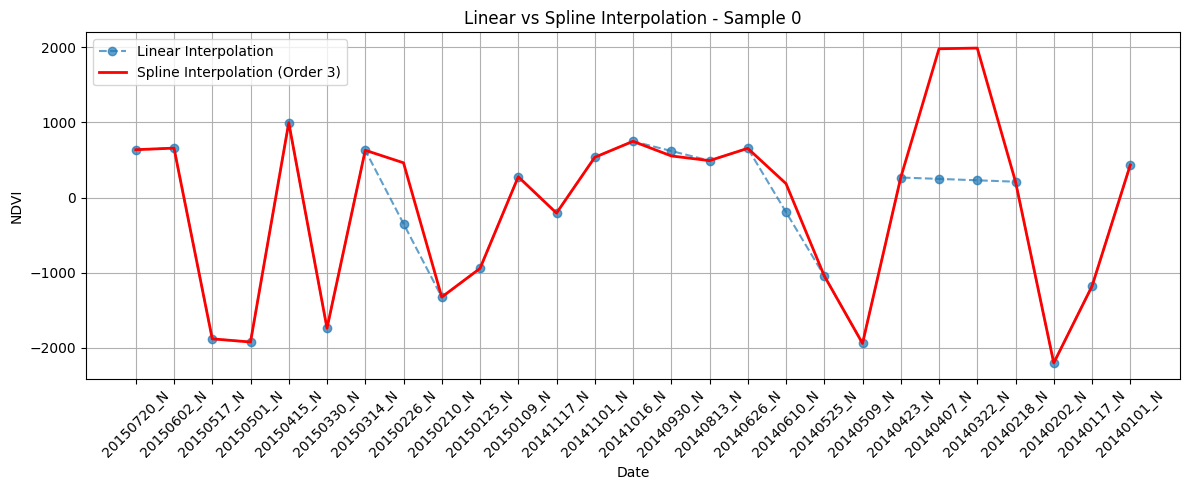

In [ ]:
# Choose a sample index to visualize
sample_index = 0

# Extract NDVI values
linear_ndvi = df_linear.loc[sample_index, ndvi_cols].values.astype(float)
spline_ndvi = df_spline.loc[sample_index, ndvi_cols].values.astype(float)

# Plot comparison
plt.figure(figsize=(12, 5))
plt.plot(ndvi_cols, linear_ndvi, 'o--', label='Linear Interpolation', alpha=0.7)
plt.plot(ndvi_cols, spline_ndvi, 'r-', label='Spline Interpolation (Order 3)', linewidth=2)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title(f'Linear vs Spline Interpolation - Sample {sample_index}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Denoising

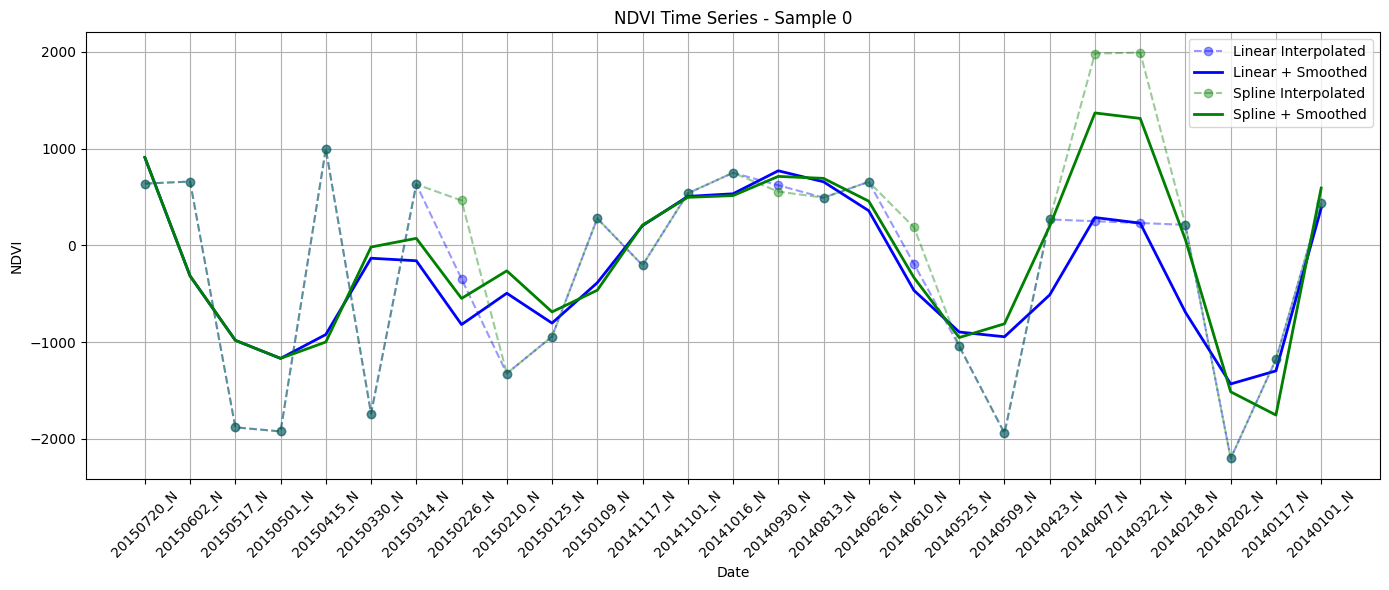

In [ ]:
from scipy.signal import savgol_filter

# Step 1: Define Savitzky-Golay smoothing function
def smooth_row(row, window=7, poly=3):
    y = row[ndvi_cols].values.astype(float)
    if np.isnan(y).any() or len(y) < window:
        return pd.Series(y, index=ndvi_cols)
    smoothed = savgol_filter(y, window_length=window, polyorder=poly)
    return pd.Series(smoothed, index=ndvi_cols)

# Step 2: Apply smoothing to both datasets
df_linear_smooth = df_linear.copy()
df_linear_smooth[ndvi_cols] = df_linear_smooth.apply(smooth_row, axis=1)

df_spline_smooth = df_spline.copy()
df_spline_smooth[ndvi_cols] = df_spline_smooth.apply(smooth_row, axis=1)

# Step 3: Plot comparison for one sample
sample_index = 0

plt.figure(figsize=(14, 6))

plt.plot(ndvi_cols, df_linear.loc[sample_index, ndvi_cols], 'bo--', alpha=0.4, label='Linear Interpolated')
plt.plot(ndvi_cols, df_linear_smooth.loc[sample_index, ndvi_cols], 'b-', linewidth=2, label='Linear + Smoothed')

plt.plot(ndvi_cols, df_spline.loc[sample_index, ndvi_cols], 'go--', alpha=0.4, label='Spline Interpolated')
plt.plot(ndvi_cols, df_spline_smooth.loc[sample_index, ndvi_cols], 'g-', linewidth=2, label='Spline + Smoothed')

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("NDVI")
plt.title(f"NDVI Time Series - Sample {sample_index}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

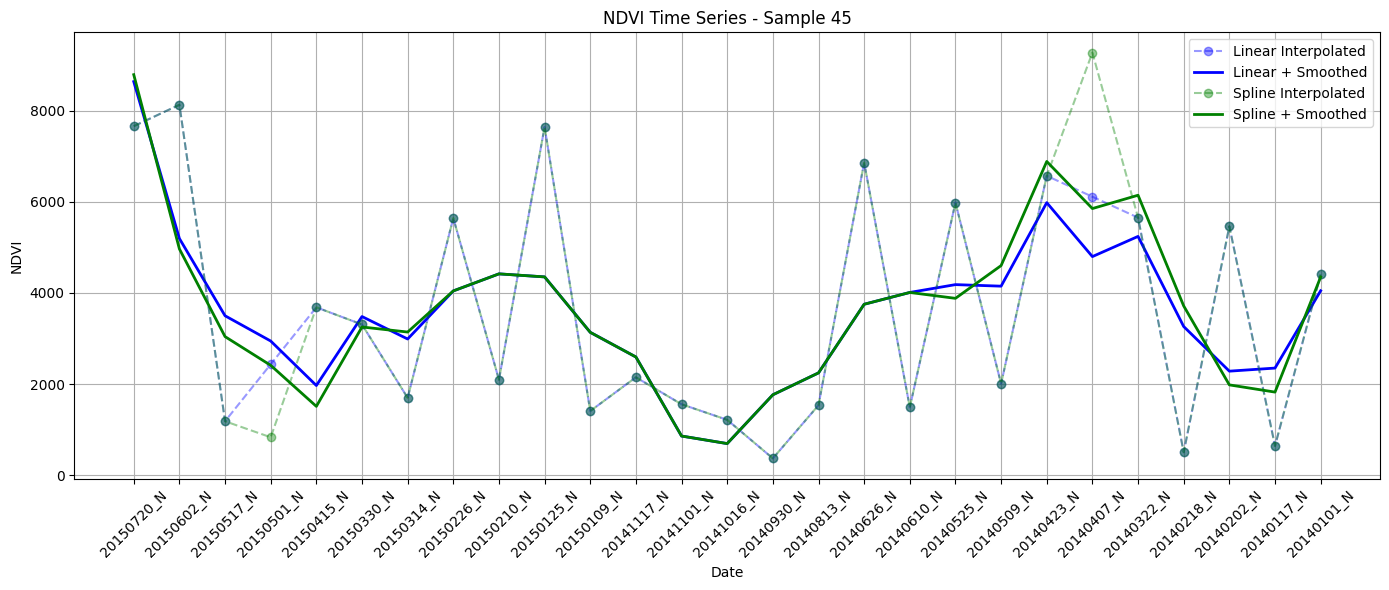

In [ ]:
sample_index = 45

plt.figure(figsize=(14, 6))

plt.plot(ndvi_cols, df_linear.loc[sample_index, ndvi_cols], 'bo--', alpha=0.4, label='Linear Interpolated')
plt.plot(ndvi_cols, df_linear_smooth.loc[sample_index, ndvi_cols], 'b-', linewidth=2, label='Linear + Smoothed')

plt.plot(ndvi_cols, df_spline.loc[sample_index, ndvi_cols], 'go--', alpha=0.4, label='Spline Interpolated')
plt.plot(ndvi_cols, df_spline_smooth.loc[sample_index, ndvi_cols], 'g-', linewidth=2, label='Spline + Smoothed')

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("NDVI")
plt.title(f"NDVI Time Series - Sample {sample_index}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Engineering

In [ ]:
from scipy.stats import skew
from sklearn.linear_model import LinearRegression

def extract_features(df, ndvi_cols):
    X_feat = pd.DataFrame(index=df.index)

    # Basic stats
    X_feat['mean_ndvi'] = df[ndvi_cols].mean(axis=1)
    X_feat['std_ndvi'] = df[ndvi_cols].std(axis=1)
    X_feat['min_ndvi'] = df[ndvi_cols].min(axis=1)
    X_feat['max_ndvi'] = df[ndvi_cols].max(axis=1)
    X_feat['ndvi_range'] = X_feat['max_ndvi'] - X_feat['min_ndvi']
    X_feat['ndvi_q25'] = df[ndvi_cols].quantile(0.25, axis=1)
    X_feat['ndvi_median'] = df[ndvi_cols].median(axis=1)
    X_feat['ndvi_q75'] = df[ndvi_cols].quantile(0.75, axis=1)
    X_feat['ndvi_skew'] = df[ndvi_cols].apply(skew, axis=1)

    # NDVI trend slope (simple linear fit)
    x_time = np.arange(len(ndvi_cols)).reshape(-1, 1)
    def compute_slope(row):
        y = row[ndvi_cols].values.reshape(-1, 1)
        model = LinearRegression().fit(x_time, y)
        return model.coef_[0][0]

    X_feat['ndvi_trend_slope'] = df.apply(compute_slope, axis=1)

    return X_feat

In [ ]:
# For Linear-smoothed data
X_linear = extract_features(df_linear_smooth, ndvi_cols)

# For Spline-smoothed data
X_spline = extract_features(df_spline_smooth, ndvi_cols)

# Linear and Spline Interpolation with Savitzky-Golay Filter

## Logistic regression with New Variables

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Label encode the target
le = LabelEncoder()
y = le.fit_transform(df_linear['class'])  # Or df_spline['class'], should be identical

# Function to train and evaluate model
def train_and_evaluate(X, y, label):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n=== {label} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    return model, y_test, y_pred

# Train and compare
model_linear, y_test_linear, y_pred_linear = train_and_evaluate(X_linear, y, "Linear Interpolation")
model_spline, y_test_spline, y_pred_spline = train_and_evaluate(X_spline, y, "Spline Interpolation")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi


=== Linear Interpolation ===
Accuracy: 0.7781
Classification Report:

              precision    recall  f1-score   support

        farm       0.00      0.00      0.00       168
      forest       0.78      1.00      0.87      1232
       grass       0.00      0.00      0.00        39
  impervious       0.67      0.01      0.03       134
     orchard       0.00      0.00      0.00         6
       water       0.92      0.52      0.67        21

    accuracy                           0.78      1600
   macro avg       0.39      0.26      0.26      1600
weighted avg       0.67      0.78      0.68      1600


=== Spline Interpolation ===
Accuracy: 0.7706
Classification Report:

              precision    recall  f1-score   support

        farm       0.00      0.00      0.00       168
      forest       0.77      1.00      0.87      1232
       grass       0.00      0.00      0.00        39
  impervious       0.00      0.00      0.00       134
     orchard       0.00      0.00      0.00 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [ ]:
df_linear['class'].value_counts(normalize=True)

,proportion
class,
forest,0.769875
farm,0.105125
impervious,0.083625
grass,0.024500
water,0.013125
orchard,0.003750


## Logistic Regression with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Step 1: NDVI columns
ndvi_cols = [col for col in df_linear_smooth.columns if '_N' in col]

# Step 2: Encode target labels
le = LabelEncoder()
df_linear_smooth['label'] = le.fit_transform(df_linear_smooth['class'])
df_spline_smooth['label'] = le.transform(df_spline_smooth['class'])  # same encoding

# Step 3: Training and evaluation function
def train_with_smote(df, label_col, feature_cols, name):
    print(f"\n=== {name.upper()} + SMOTE ===")

    X = df[feature_cols]
    y = df[label_col]

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )

    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # Model
    model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
    model.fit(X_train_res, y_train_res)

    # Evaluate
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

# Step 4: Run on both smoothed datasets
train_with_smote(df_linear_smooth, 'label', ndvi_cols, name='Linear Interpolation + Smoothed')
train_with_smote(df_spline_smooth, 'label', ndvi_cols, name='Spline Interpolation + Smoothed')


=== LINEAR INTERPOLATION + SMOOTHED + SMOTE ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'mul

Accuracy: 0.6125
Classification Report:
              precision    recall  f1-score   support

        farm       0.42      0.48      0.45       168
      forest       0.95      0.63      0.76      1232
       grass       0.15      0.59      0.24        39
  impervious       0.48      0.61      0.54       134
     orchard       0.02      0.67      0.04         6
       water       0.15      0.62      0.24        21

    accuracy                           0.61      1600
   macro avg       0.36      0.60      0.38      1600
weighted avg       0.82      0.61      0.69      1600


=== SPLINE INTERPOLATION + SMOOTHED + SMOTE ===
Accuracy: 0.5300
Classification Report:
              precision    recall  f1-score   support

        farm       0.35      0.43      0.39       168
      forest       0.93      0.54      0.68      1232
       grass       0.12      0.59      0.20        39
  impervious       0.38      0.50      0.43       134
     orchard       0.02      0.67      0.04         6
   

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Logistic Regression without SMOTE with just NDVI cols

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# 1. Label encode target
le = LabelEncoder()
y_linear = le.fit_transform(df_linear_smooth['class'])
y_spline = le.transform(df_spline_smooth['class'])  # use same encoder

X_linear1 = df_linear_smooth[ndvi_cols]
X_spline1 = df_spline_smooth[ndvi_cols]

# 2. Define training and evaluation function
def train_and_evaluate(X, y, label):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n=== {label} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    return model, y_test, y_pred

# 3. Run both
model_linear2, y_test_linear, y_pred_linear = train_and_evaluate(X_linear1, y_linear, "Linear Interpolation + Smoothed")
model_spline2, y_test_spline, y_pred_spline = train_and_evaluate(X_spline1, y_spline, "Spline Interpolation + Smoothed")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'mul


=== Linear Interpolation + Smoothed ===
Accuracy: 0.8256
Classification Report:
              precision    recall  f1-score   support

        farm       0.57      0.31      0.40       168
      forest       0.85      0.97      0.90      1232
       grass       0.36      0.13      0.19        39
  impervious       0.78      0.46      0.58       134
     orchard       0.50      0.17      0.25         6
       water       0.80      0.57      0.67        21

    accuracy                           0.83      1600
   macro avg       0.64      0.43      0.50      1600
weighted avg       0.80      0.83      0.80      1600


=== Spline Interpolation + Smoothed ===
Accuracy: 0.8025
Classification Report:
              precision    recall  f1-score   support

        farm       0.55      0.26      0.35       168
      forest       0.82      0.96      0.89      1232
       grass       0.00      0.00      0.00        39
  impervious       0.71      0.31      0.43       134
     orchard       1.00 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## LR with NDVI cols and feature engineered variables

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Label encode target
le = LabelEncoder()

# Function to combine and evaluate
def train_with_combined(ndvi_df, feats_df, method_name):

    # Drop ID and class from features, extract target
    y = le.fit_transform(ndvi_df['class'])
    X = feats_df

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, stratify=y, random_state=42
    )

    # Train logistic regression
    model = LogisticRegression(max_iter=2000, solver='lbfgs')
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    print(f"\n=== {method_name} Interpolation + Features ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

# Run for both linear and spline versions
train_with_combined(df_linear_smooth, X_linear, "Linear")
train_with_combined(df_spline_smooth, X_spline, "Spline")


=== Linear Interpolation + Features ===
Accuracy: 0.8281
Classification Report:

              precision    recall  f1-score   support

        farm       0.27      0.07      0.11       168
      forest       0.86      0.97      0.91      1232
       grass       0.00      0.00      0.00        39
  impervious       0.71      0.78      0.74       134
     orchard       0.00      0.00      0.00         6
       water       0.91      0.48      0.62        21

    accuracy                           0.83      1600
   macro avg       0.46      0.38      0.40      1600
weighted avg       0.76      0.83      0.78      1600



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Spline Interpolation + Features ===
Accuracy: 0.8269
Classification Report:

              precision    recall  f1-score   support

        farm       0.00      0.00      0.00       168
      forest       0.84      0.99      0.91      1232
       grass       0.00      0.00      0.00        39
  impervious       0.74      0.75      0.75       134
     orchard       0.00      0.00      0.00         6
       water       0.75      0.29      0.41        21

    accuracy                           0.83      1600
   macro avg       0.39      0.34      0.34      1600
weighted avg       0.72      0.83      0.77      1600



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Stratified Sampling and Cross Validation

In [ ]:
feature_cols = X_linear.columns

# Concatenate NDVI data with feature-engineered data
X_linear_full = pd.concat([df_linear_smooth[ndvi_cols], X_linear], axis=1)
X_spline_full = pd.concat([df_spline_smooth[ndvi_cols], X_spline], axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Label encode target
le = LabelEncoder()

# Function to combine and evaluate
def train_with_combined(ndvi_df, feats_df, method_name):

    # Extract target and features
    y = le.fit_transform(ndvi_df['class'])
    X = feats_df

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-test split (stratified)
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, stratify=y, random_state=42
    )

    # Train logistic regression
    model = LogisticRegression(max_iter=3000, solver='lbfgs')
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    print(f"\n=== {method_name} Interpolation + Features ===")
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # 5-fold Stratified Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_scaled, y, cv=skf, scoring='accuracy')
    print(f"{method_name} + Features Stratified CV Accuracy: {cv_scores.mean():.4f}")

    # Return everything needed
    return model, scaler, y_test, y_pred

# Run for both linear and spline
model_linear, scaler_linear, y_test_linear, y_pred_linear = train_with_combined(df_linear_smooth, X_linear_full, "Linear")
model_spline, scaler_spline, y_test_spline, y_pred_spline = train_with_combined(df_spline_smooth, X_spline_full, "Spline")


=== Linear Interpolation + Features ===
Test Accuracy: 0.8794
Classification Report:

              precision    recall  f1-score   support

        farm       0.65      0.43      0.52       168
      forest       0.91      0.98      0.94      1232
       grass       0.90      0.23      0.37        39
  impervious       0.80      0.83      0.81       134
     orchard       0.00      0.00      0.00         6
       water       0.86      0.57      0.69        21

    accuracy                           0.88      1600
   macro avg       0.69      0.51      0.55      1600
weighted avg       0.87      0.88      0.86      1600



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Linear + Features Stratified CV Accuracy: 0.8891

=== Spline Interpolation + Features ===
Test Accuracy: 0.8631
Classification Report:

              precision    recall  f1-score   support

        farm       0.63      0.34      0.44       168
      forest       0.89      0.97      0.93      1232
       grass       0.67      0.10      0.18        39
  impervious       0.81      0.84      0.82       134
     orchard       0.00      0.00      0.00         6
       water       0.75      0.57      0.65        21

    accuracy                           0.86      1600
   macro avg       0.62      0.47      0.50      1600
weighted avg       0.84      0.86      0.84      1600



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Spline + Features Stratified CV Accuracy: 0.8670


# Classifying the test data

In [ ]:
df_test = pd.read_csv("hacktest.csv")

In [ ]:
df_test.head()

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,7466.42,413.162,5761.00,5625.45,489.403,3923.84,3097.110,6766.42,...,801.184,927.115,4704.14,6378.42,340.949,2695.570,527.268,4736.75,601.843,6639.760
1,1,2,7235.26,6037.350,1027.56,6085.14,1618.050,6668.54,2513.990,1051.69,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.140,3298.110,6942.68,1070.440,842.101
2,2,3,7425.08,6969.980,1177.94,7408.93,861.061,7644.43,814.458,1504.29,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.990,2206.100,6928.93,1036.560,831.441
3,3,4,7119.12,1731.620,6311.93,6441.61,465.979,7128.42,1649.120,6935.22,...,959.344,5794.150,1045.57,5572.90,586.287,685.906,1287.000,6734.72,824.584,6883.610
4,4,5,7519.55,8130.260,1482.54,7879.53,1001.210,7937.60,4122.530,1094.51,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.520,3283.940,7937.68,1857.800,1336.920


In [ ]:
df_test = df_test.iloc[:,1:]

In [ ]:
df_test.head()

,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,1,7466.42,413.162,5761.00,5625.45,489.403,3923.84,3097.110,6766.42,2829.13,...,801.184,927.115,4704.14,6378.42,340.949,2695.570,527.268,4736.75,601.843,6639.760
1,2,7235.26,6037.350,1027.56,6085.14,1618.050,6668.54,2513.990,1051.69,7268.22,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.140,3298.110,6942.68,1070.440,842.101
2,3,7425.08,6969.980,1177.94,7408.93,861.061,7644.43,814.458,1504.29,7002.63,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.990,2206.100,6928.93,1036.560,831.441
3,4,7119.12,1731.620,6311.93,6441.61,465.979,7128.42,1649.120,6935.22,2176.80,...,959.344,5794.150,1045.57,5572.90,586.287,685.906,1287.000,6734.72,824.584,6883.610
4,5,7519.55,8130.260,1482.54,7879.53,1001.210,7937.60,4122.530,1094.51,7951.44,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.520,3283.940,7937.68,1857.800,1336.920


In [ ]:
X_test_features = extract_features(df_test, ndvi_cols)

In [ ]:
X_test_features.head()

,mean_ndvi,std_ndvi,min_ndvi,max_ndvi,ndvi_range,ndvi_q25,ndvi_median,ndvi_q75,ndvi_skew,ndvi_trend_slope
0,3343.529778,2477.036970,340.949,7466.42,7125.471,840.498,3097.11,5567.455,0.156243,-58.403572
1,3750.664704,2514.860621,535.296,7425.84,6890.544,1152.290,3298.11,6061.245,0.130784,-68.965761
2,3790.384667,2807.079716,522.798,7644.43,7121.632,1107.250,2206.10,6949.455,0.185382,-73.940891
3,3242.310704,2627.535640,465.979,7128.42,6662.441,967.842,1731.62,6094.600,0.434739,-49.364616
4,4468.600704,2980.248232,550.508,8130.26,7579.752,1448.030,4345.24,7685.100,0.047341,-78.656631


In [ ]:
# --- LINEAR MODEL PREDICTION ---

# Combine test NDVI and feature-engineered variables
new_test_combined_linear = pd.concat([df_test.reset_index(drop=True), X_test_features.reset_index(drop=True)], axis=1)

# Drop 'ID' and 'class' columns
X_new_linear = new_test_combined_linear.drop(columns=['ID'], errors='ignore')

# Scale with linear model's scaler
X_new_scaled_linear = scaler_linear.transform(X_new_linear)

# Predict with linear model
y_new_pred_linear = model_linear.predict(X_new_scaled_linear)

# Decode predicted class labels
predicted_classes_linear = le.inverse_transform(y_new_pred_linear)

# Create results DataFrame
results_linear = pd.DataFrame({
    'ID': df_test['ID'] if 'ID' in df_test.columns else range(len(predicted_classes_linear)),
    'Predicted Class (Linear)': predicted_classes_linear
})

# Display sample predictions
print("\nSample Predictions using Linear Model:")
print(results_linear.head())


Sample Predictions using Linear Model:
   ID Predicted Class (Linear)
0   1                   forest
1   2                   forest
2   3                   forest
3   4                     farm
4   5                   forest


In [ ]:
# --- SPLINE MODEL PREDICTION ---

# Combine test NDVI and feature-engineered variables
new_test_combined_spline = pd.concat([df_test.reset_index(drop=True), X_test_features.reset_index(drop=True)], axis=1)

# Drop 'ID' and 'class' columns
X_new_spline = new_test_combined_spline.drop(columns=['ID'], errors='ignore')

# Scale with spline model's scaler
X_new_scaled_spline = scaler_spline.transform(X_new_spline)

# Predict with spline model
y_new_pred_spline = model_spline.predict(X_new_scaled_spline)

# Decode predicted class labels
predicted_classes_spline = le.inverse_transform(y_new_pred_spline)

# Create results DataFrame
results_spline = pd.DataFrame({
    'ID': df_test['ID'] if 'ID' in df_test.columns else range(len(predicted_classes_spline)),
    'Predicted Class (Spline)': predicted_classes_spline
})

# Display sample predictions
print("\nSample Predictions using Spline Model:")
print(results_spline.head())


Sample Predictions using Spline Model:
   ID Predicted Class (Spline)
0   1                   forest
1   2                   forest
2   3                   forest
3   4                     farm
4   5                   forest


In [ ]:
results_linear.to_csv("final_predictions_l.csv", index=False)
results_spline.to_csv("final_predictions_s.csv", index=False)

#Median Filtering

In [ ]:
from scipy.signal import medfilt

df_ndvi = df_linear[ndvi_cols].copy()

# Convert to numeric just in case
df_ndvi = df_ndvi.apply(pd.to_numeric, errors='coerce')

# Create a copy to store the filtered result
df_median_filtered = df_ndvi.copy()

# Apply median filter row-wise
for i in range(len(df_ndvi)):
    row = df_ndvi.iloc[i].values.astype(float)  # ensure it's float
    df_median_filtered.iloc[i] = medfilt(row, kernel_size=3)

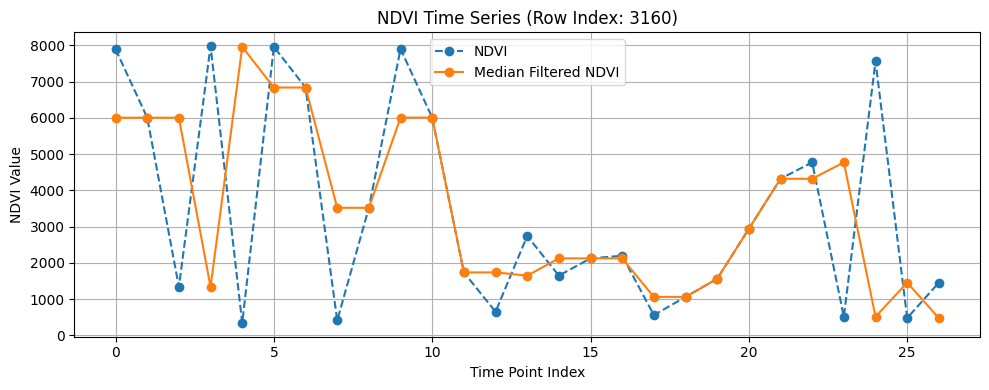

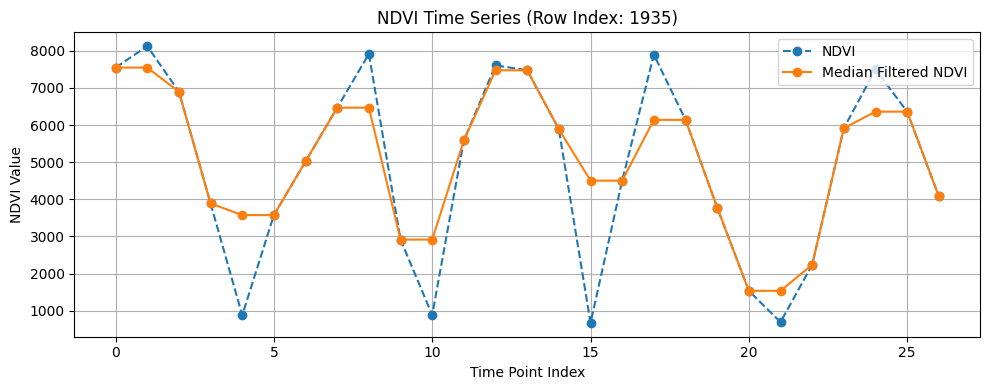

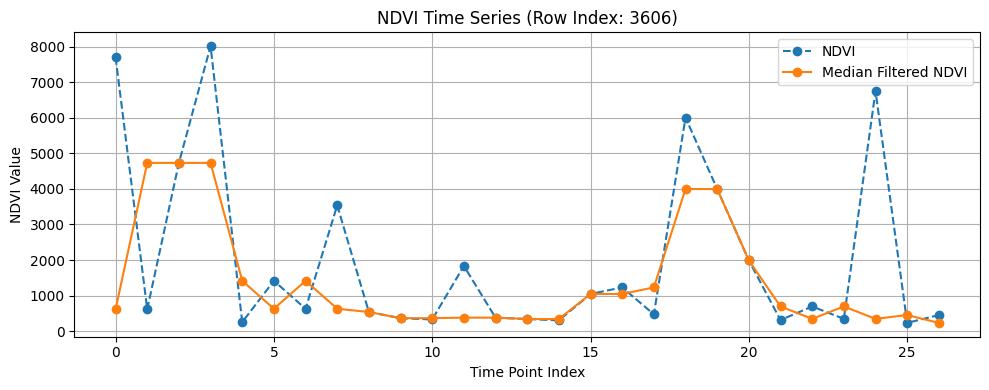

In [ ]:
sample_indices = np.random.choice(len(df_ndvi), size=3, replace=False)

# Plot original vs. median filtered
for idx in sample_indices:
    original = df_ndvi.iloc[idx].values.astype(float)
    filtered = df_median_filtered.iloc[idx].values.astype(float)

    plt.figure(figsize=(10, 4))
    plt.plot(original, label='NDVI', marker='o', linestyle='--')
    plt.plot(filtered, label='Median Filtered NDVI', marker='o', linestyle='-')
    plt.title(f'NDVI Time Series (Row Index: {idx})')
    plt.xlabel('Time Point Index')
    plt.ylabel('NDVI Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
X_mdf_f = extract_features(df_median_filtered, ndvi_cols)

In [ ]:
X_mdf_f = pd.concat([df_median_filtered, X_mdf_f], axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Label encode target
le = LabelEncoder()

def train_with_combined(ndvi_df, feats_df, method_name):
    try:
        # Extract target and features
        y = le.fit_transform(ndvi_df['class'])
        X = feats_df

        # Scale features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Train-test split (stratified)
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=0.2, stratify=y, random_state=42
        )

        # Train logistic regression
        model = LogisticRegression(max_iter=3000, solver='lbfgs')
        model.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = model.predict(X_test)
        print(f"\n=== {method_name} Interpolation + Features ===")
        print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print("Classification Report:\n")
        print(classification_report(y_test, y_pred, target_names=le.classes_))

        # 5-fold Stratified Cross-Validation
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(model, X_scaled, y, cv=skf, scoring='accuracy')
        print(f"{method_name} + Features Stratified CV Accuracy: {cv_scores.mean():.4f}")

        return model, scaler, y_test, y_pred

    except Exception as e:
        print(f"❌ Error inside train_with_combined: {e}")
        return None

In [ ]:
model_median, scaler_medianr, y_test_median, y_pred_median = train_with_combined(df_linear_smooth, X_mdf_f, "Median Filtering")


=== Median Filtering Interpolation + Features ===
Test Accuracy: 0.8688
Classification Report:

              precision    recall  f1-score   support

        farm       0.70      0.43      0.53       168
      forest       0.90      0.96      0.93      1232
       grass       0.70      0.36      0.47        39
  impervious       0.73      0.79      0.76       134
     orchard       0.00      0.00      0.00         6
       water       0.85      0.52      0.65        21

    accuracy                           0.87      1600
   macro avg       0.65      0.51      0.56      1600
weighted avg       0.86      0.87      0.86      1600



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Median Filtering + Features Stratified CV Accuracy: 0.8788


In [ ]:
# --- MEDIAN MODEL PREDICTION ---

# Combine test NDVI and feature-engineered variables
new_test_combined_median = pd.concat([df_test.reset_index(drop=True), X_test_features.reset_index(drop=True)], axis=1)

# Drop 'ID' and 'class' columns
X_new_median = new_test_combined_median.drop(columns=['ID'], errors='ignore')

# Scale with linear model's scaler
X_new_scaled_median = scaler_medianr.transform(X_new_median)

# Predict with linear model
y_new_pred_median = model_median.predict(X_new_scaled_median)

# Decode predicted class labels
predicted_classes_median = le.inverse_transform(y_new_pred_median)

# Create results DataFrame
results_median = pd.DataFrame({
    'ID': df_test['ID'] if 'ID' in df_test.columns else range(len(predicted_classes_median)),
    'class': predicted_classes_median
})

# Display sample predictions
print("\nSample Predictions using median Model:")
print(results_median.head())


Sample Predictions using median Model:
   ID   class
0   1    farm
1   2  forest
2   3  forest
3   4  forest
4   5  forest


In [ ]:
results_median.to_csv("final_predictions_m.csv", index=False)

# Low Pass Filtering

In [ ]:
from scipy.signal import  butter, filtfilt

# STEP: Define Low-Pass Filter Function
def butter_lowpass_filter(data, cutoff=0.1, fs=1.0, order=3):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# STEP: Apply Low-Pass Filter
df_lowpass_filtered = df_ndvi.copy()
for i in range(len(df_ndvi)):
    row = df_ndvi.iloc[i].values.astype(float)
    df_lowpass_filtered.iloc[i] = butter_lowpass_filter(row)

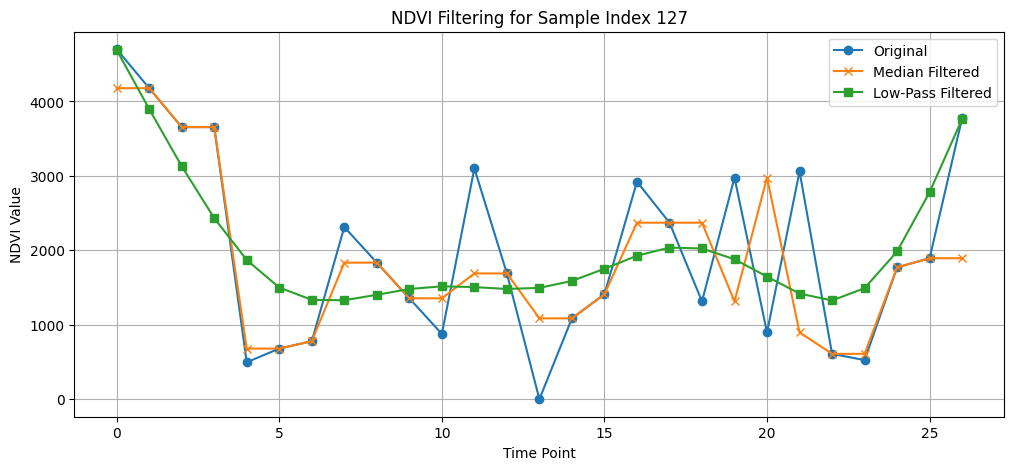

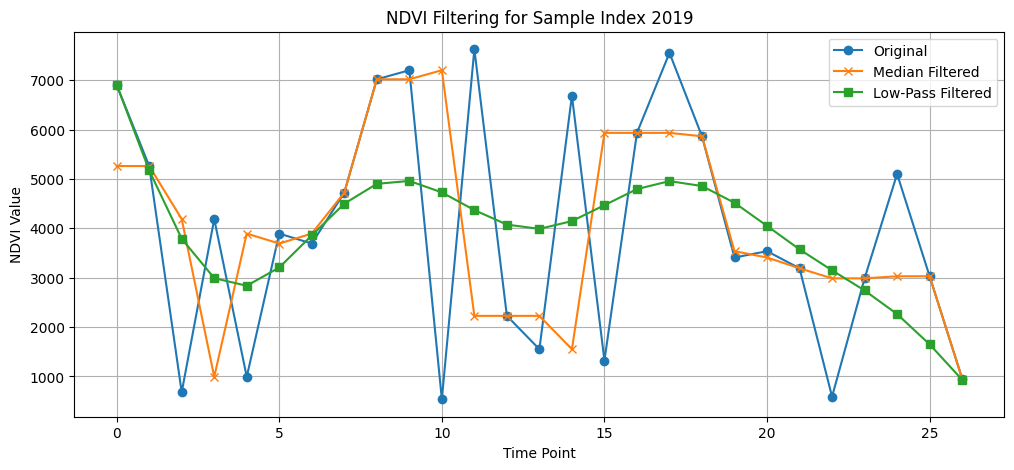

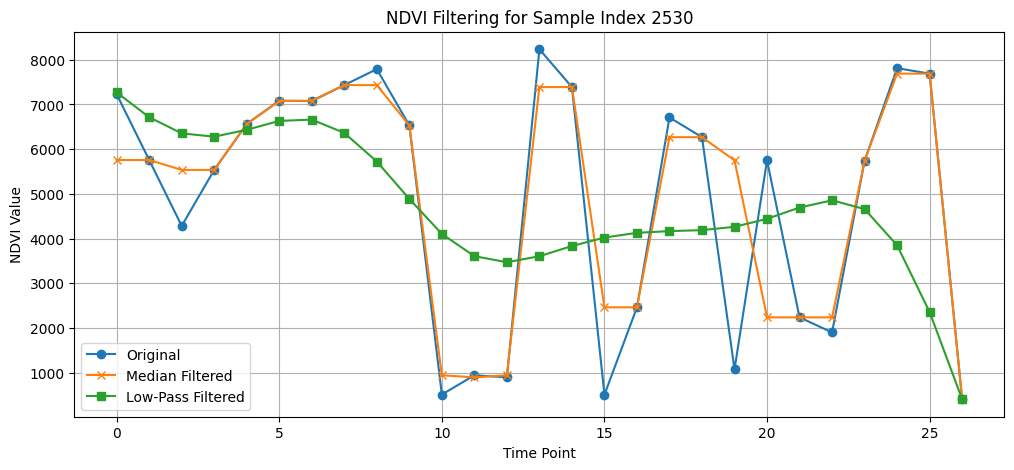

In [ ]:
sample_indices = np.random.choice(df_ndvi.index, size=3, replace=False)
time_points = list(range(len(ndvi_cols)))

for idx in sample_indices:
    original = df_ndvi.loc[idx].values.astype(float)
    median_filtered = df_median_filtered.loc[idx].values.astype(float)
    lowpass_filtered = df_lowpass_filtered.loc[idx].values.astype(float)

    plt.figure(figsize=(12, 5))
    plt.plot(time_points, original, label='Original', marker='o')
    plt.plot(time_points, median_filtered, label='Median Filtered', marker='x')
    plt.plot(time_points, lowpass_filtered, label='Low-Pass Filtered', marker='s')
    plt.title(f"NDVI Filtering for Sample Index {idx}")
    plt.xlabel("Time Point")
    plt.ylabel("NDVI Value")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
X_lpf = extract_features(df_lowpass_filtered, ndvi_cols)

In [ ]:
X_lpf = pd.concat([df_lowpass_filtered, X_lpf], axis=1)

In [ ]:
model_lpf, scaler_lpf, y_test_lpf, y_pred_lpf = train_with_combined(df_linear_smooth, X_lpf, "Low Pass Filtering")


=== Low Pass Filtering Interpolation + Features ===
Test Accuracy: 0.8556
Classification Report:

              precision    recall  f1-score   support

        farm       0.52      0.31      0.39       168
      forest       0.89      0.97      0.93      1232
       grass       0.80      0.10      0.18        39
  impervious       0.78      0.80      0.79       134
     orchard       0.00      0.00      0.00         6
       water       0.92      0.57      0.71        21

    accuracy                           0.86      1600
   macro avg       0.65      0.46      0.50      1600
weighted avg       0.84      0.86      0.83      1600



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Low Pass Filtering + Features Stratified CV Accuracy: 0.8644


In [ ]:
# --- LPF MODEL PREDICTION ---

# Combine test NDVI and feature-engineered variables
new_test_combined_lpf = pd.concat([df_test.reset_index(drop=True), X_test_features.reset_index(drop=True)], axis=1)

# Drop 'ID' and 'class' columns
X_new_lpf = new_test_combined_lpf.drop(columns=['ID'], errors='ignore')

X_new_scaled_lpf = scaler_lpf.transform(X_new_lpf)

y_new_pred_lpf = model_lpf.predict(X_new_scaled_lpf)

predicted_classes_lpf = le.inverse_transform(y_new_pred_lpf)

# Create results DataFrame
results_lpf = pd.DataFrame({
    'ID': df_test['ID'] if 'ID' in df_test.columns else range(len(predicted_classes_lpf)),
    'class': predicted_classes_lpf
})

# Display sample predictions
print("\nSample Predictions using lpf Model:")
print(results_lpf.head())


Sample Predictions using lpf Model:
   ID       class
0   1      forest
1   2      forest
2   3  impervious
3   4      forest
4   5      forest


In [ ]:
results_lpf.to_csv("final_predictions_lpf.csv", index=False)

# Comparison of Denoising

In [ ]:
df_linear_smooth = df_linear_smooth.drop(['label', 'class'], axis=1)
df_spline_smooth = df_spline_smooth.drop(['label', 'class'], axis=1)

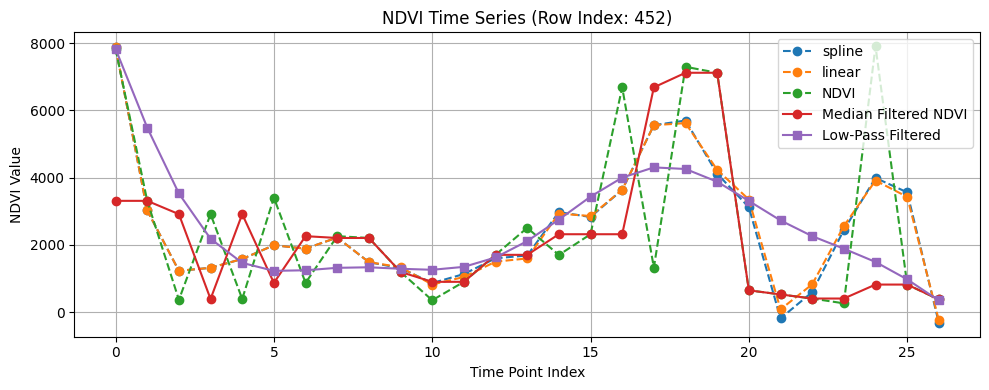

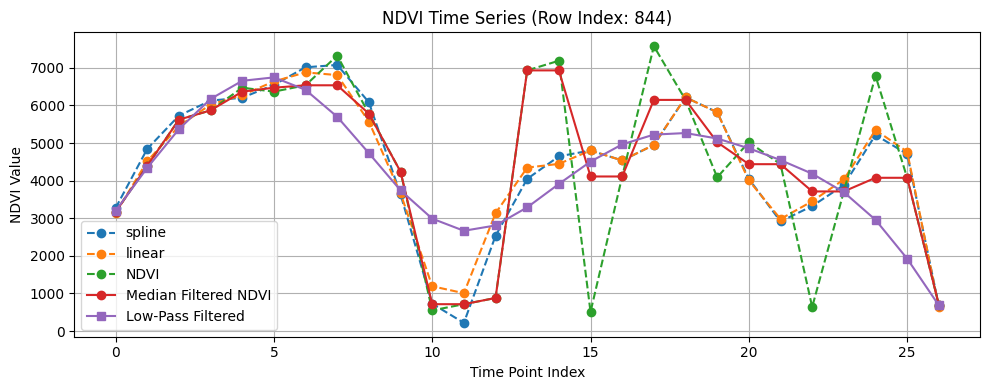

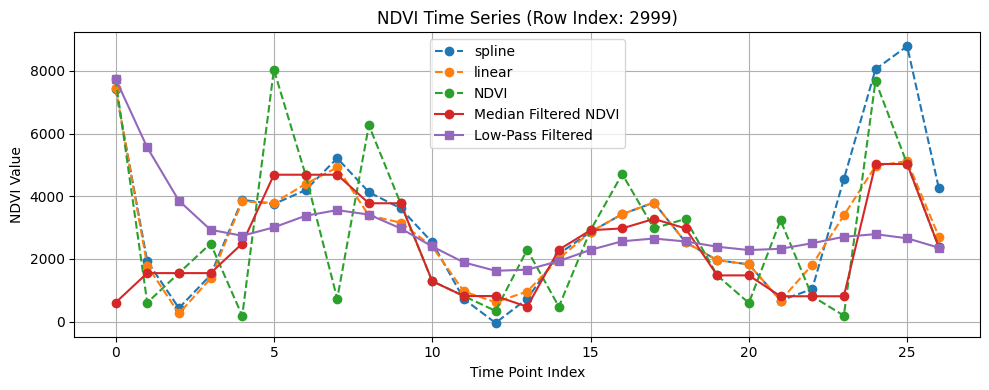

In [ ]:
sample_indices = np.random.choice(len(df_ndvi), size=3, replace=False)
time_points = list(range(len(ndvi_cols)))
# Plot original vs. median filtered
for idx in sample_indices:
    original = df_ndvi.iloc[idx].values.astype(float)
    filtered = df_median_filtered.iloc[idx].values.astype(float)
    linear = df_linear_smooth.iloc[idx].values.astype(float)
    spline = df_spline_smooth.iloc[idx].values.astype(float)
    lowpass_filtered = df_lowpass_filtered.loc[idx].values.astype(float)
    plt.figure(figsize=(10, 4))
    plt.plot(spline, label='spline', marker='o', linestyle='--')
    plt.plot(linear, label='linear', marker='o', linestyle='--')
    plt.plot(original, label='NDVI', marker='o', linestyle='--')
    plt.plot(filtered, label='Median Filtered NDVI', marker='o', linestyle='-')
    plt.plot(lowpass_filtered, label='Low-Pass Filtered', marker='s')
    plt.title(f'NDVI Time Series (Row Index: {idx})')
    plt.xlabel('Time Point Index')
    plt.ylabel('NDVI Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Other Models

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
# -----------------------------
# Choose ONE imputation dataset
# -----------------------------
# median filtered NDVI
le = LabelEncoder()
y = le.fit_transform(df_linear['class'])
X = X_mdf_f.copy()


# Split train/test
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Define models to try
# -----------------------------

models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric="mlogloss"),
    "LightGBM": LGBMClassifier(n_estimators=200, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SVM": SVC(kernel="rbf", probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}


# -----------------------------
# Train and evaluate
# -----------------------------
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    acc = accuracy_score(y_val, preds)
    results[name] = acc
    print(f"{name}: Validation Accuracy = {acc:.4f}")

# Show results sorted
results_df = pd.DataFrame(results.items(), columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
print("\nModel Comparison:\n", results_df)

Random Forest: Validation Accuracy = 0.8994
Gradient Boosting: Validation Accuracy = 0.9056
AdaBoost: Validation Accuracy = 0.8550


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:38:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: Validation Accuracy = 0.9156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9435
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 37
[LightGBM] [Info] Start training from score -2.252308
[LightGBM] [Info] Start training from score -0.261568
[LightGBM] [Info] Start training from score -3.707807
[LightGBM] [Info] Start training from score -2.481787
[LightGBM] [Info] Start training from score -5.585999
[LightGBM] [Info] Start training from score -4.333236
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Validation Accuracy = 0.8344
SVM: Validation Accuracy = 0.9019
KNN: Validation Accuracy = 0.9056

Model Comparison:
                  Model  Accuracy
4             LightGBM  0.920000
3              XGBoost  0.915625
7                  KNN  0.905625
1    Gradient Boosting  0.905625
6                  SVM  0.901875
0        Random Forest  0.899375
2             AdaBoost  0.855000
5  Logistic Regression  0.834375


In [ ]:
lgb_model = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)

# Train on train split
lgb_model.fit(X_train, y_train)

# Validation performance
val_preds = lgb_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, val_preds))
print("\nClassification Report:\n", classification_report(y_val, val_preds))

# Retrain on full data
lgb_model.fit(X, y)

# Predict on test data
y_new_pred_median_lgb = lgb_model.predict(X_new_scaled_median)

# Decode predicted class labels
predicted_classes_median_lgb = le.inverse_transform(y_new_pred_median_lgb)

# Save results
if 'ID' in df_test.columns:
    submission = pd.DataFrame({
        "id": df_test['ID'],
        "class": predicted_classes_median_lgb
    })
else:
    submission = pd.DataFrame({
        "ID": range(len(predicted_classes_median_lgb)),
        "class": predicted_classes_median_lgb
    })

submission.to_csv("submission_lgb.csv", index=False)
print("✅ Saved submission_lgb.csv")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004955 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9435
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 37
[LightGBM] [Info] Start training from score -2.252308
[LightGBM] [Info] Start training from score -0.261568
[LightGBM] [Info] Start training from score -3.707807
[LightGBM] [Info] Start training from score -2.481787
[LightGBM] [Info] Start training from score -5.585999
[LightGBM] [Info] Start training from score -4.333236
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Saved submission_lgb.csv


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define model
xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)

# Train on train split
xgb_model.fit(X_train, y_train)

# Validation performance
val_preds = xgb_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, val_preds))
print("\nClassification Report:\n", classification_report(y_val, val_preds))

# Retrain on full data
xgb_model.fit(X, y)

# Predict on test data
y_new_pred_xgb = xgb_model.predict(X_new_scaled_median)

# Decode predicted class labels
predicted_classes_xgb = le.inverse_transform(y_new_pred_xgb)

# Save results
if 'ID' in df_test.columns:
    submission = pd.DataFrame({
        "ID": df_test['ID'],
        "class": predicted_classes_xgb
    })
else:
    submission = pd.DataFrame({
        "ID": range(len(predicted_classes_xgb)),
        "class": predicted_classes_xgb
    })

submission.to_csv("submission_xgb.csv", index=False)
print("✅ Saved submission_xgb.csv")

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:54:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Validation Accuracy: 0.92375

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.70      0.77       168
           1       0.94      0.99      0.96      1232
           2       0.87      0.51      0.65        39
           3       0.85      0.83      0.84       134
           4       0.00      0.00      0.00         6
           5       0.88      0.67      0.76        21

    accuracy                           0.92      1600
   macro avg       0.73      0.62      0.66      1600
weighted avg       0.92      0.92      0.92      1600



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/xgboost/t

✅ Saved submission_xgb.csv


In [ ]:
import numpy as np
import pandas as pd

# y_raw are your original labels from train df (strings)
y_raw = df_linear['class']

# (Optional) canonicalize labels to avoid whitespace/casing issues
y_raw = y_raw.astype(str).str.strip().str.lower()

# Fit once globally (do this exactly once and reuse `le` everywhere)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_raw)

# Show mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("LabelEncoder mapping (class -> id):")
for k, v in mapping.items():
    print(f"  {k} -> {v}")

# Round-trip sanity check
y_enc = le.transform(y_raw)
y_back = le.inverse_transform(y_enc)
assert np.array_equal(y_raw.values, y_back), "Round-trip failed — check label cleaning or duplicates!"
print("✅ Round-trip check passed.")

LabelEncoder mapping (class -> id):
  farm -> 0
  forest -> 1
  grass -> 2
  impervious -> 3
  orchard -> 4
  water -> 5
✅ Round-trip check passed.
